# Handwitten classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
#Normalize the pixel values between 0 and 1
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
#ANN Model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#converting to 1d
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')#multiclassification
])

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9266 - val_loss: 0.1254 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1101 - accuracy: 0.9675 - val_loss: 0.0931 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.9775 - val_loss: 0.0864 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0937 - val_accuracy: 0.9699
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0790 - val_accuracy: 0.9764


In [7]:
import numpy as np
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 608us/step


In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm)
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

Confusion matrix:
[[ 965    1    2    1    2    2    2    1    1    3]
 [   0 1117    3    3    0    2    4    1    3    2]
 [   2    0 1006    5    1    2    2    6    8    0]
 [   0    0    2  999    0    2    0    2    2    3]
 [   1    0    2    1  952    1    5    1    0   19]
 [   1    0    0    7    2  872    3    0    4    3]
 [   5    2    1    1    1   10  936    0    1    1]
 [   0    2   12    7    1    0    0  995    1   10]
 [   3    1    3   16    6    5    2    3  928    7]
 [   0    2    0    4    2    1    2    3    1  994]]
Accuracy: 0.9764



# Plotting

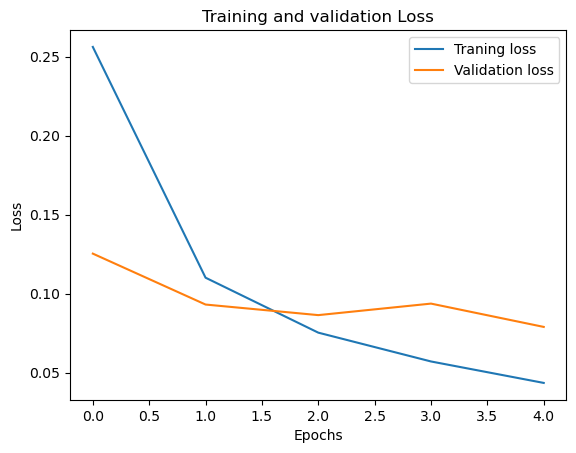

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Traning loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

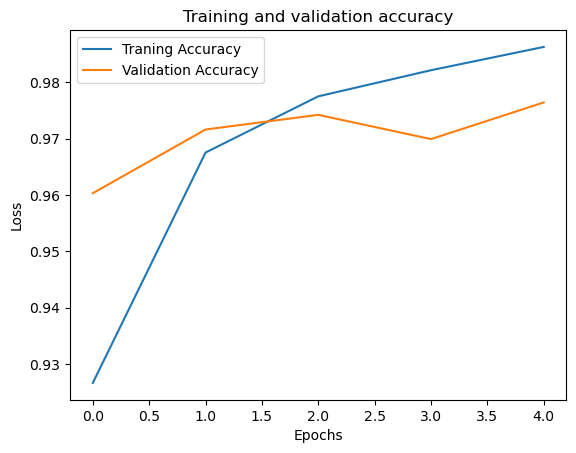

In [13]:
plt.plot(history.history['accuracy'],label='Traning Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()